### Import the necessary packages

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D  # Convolution operations on 2D images
from keras.layers import Flatten # Convert 2D array into linear vector
from keras.layers import MaxPooling2D # Max Pooling layer
from keras.layers import Dense # Full connection of neural network
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

## Checking a particular dataset

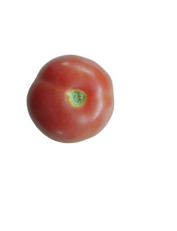

In [46]:
image = load_img("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/SingleImage/Red/IMG_20210201_140653.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

#### Checking the shape of the image

In [47]:
x = img_to_array(image)
print(x.shape)

(577, 433, 3)


#### Checking the number of classes

In [48]:
number_of_classes = len(glob("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/SingleImage" + "/*"))
number_of_classes

2

#### Load the model

In [49]:
vgg=VGG16()

In [50]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
print(type(vgg))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [52]:
## Checking for the vgg layers
vgg_layer_list = vgg.layers
vgg_layer_list

In [53]:
print(len(vgg_layer_list))

23


### Define the sequential model

In [54]:
model=Sequential()

### Adding a convolutional 2D layer

In [55]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
# First layer of convolution
# 32 means number of filters, (3,3) means shape of the filter, (64,64,3) means R,G,B

### Adding the max pooling layer

In [56]:
model.add(MaxPooling2D(pool_size=(2,2))) # Add Max Pooling Layer

### Adding the flatten and dense layers

In [57]:
model.add(Flatten()) # Reduce the dimension of the image
model.add(Dense(units=128,activation='relu')) # Add Dense layer to make it a linear vector with relu activation function

In [58]:
model.add(Dense(units=1,activation='sigmoid')) # Final Dense layer with sigmoid activation function

### Compiling the model using ADAM optimizer

In [59]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['BinaryAccuracy','accuracy'])

### Defining the train and test dataset

#### Import the ImageDataGenerator package

In [60]:
from keras.preprocessing.image import ImageDataGenerator

In [61]:
train_datagenerator=ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)
test_datagenerator=ImageDataGenerator(rescale=1./255)

training_set=train_datagenerator.flow_from_directory('C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/SingleImage/',
                                                    target_size=(64,64),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    color_mode='rgb',
                                                    shuffle=True)
test_set=test_datagenerator.flow_from_directory('C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Testing/SingleImage/',
                                                    target_size=(64,64),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    color_mode='rgb',
                                                    shuffle=True)

Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [62]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Model fit

In [63]:
model.fit_generator(training_set,
                   steps_per_epoch=1,
                   epochs=1,
                   validation_data=test_set,
                   validation_steps=1)

1/1 [==============================] - 1s 864ms/step - loss: 0.7160 - binary_accuracy: 0.5000 - accuracy: 0.5000 - val_loss: 29.8087 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000


### Define the summary of the model

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


### Code to classify the tomatoes(ripen, unripen) based on the dataset

In [69]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/SingleImage/Red/IMG_20210201_140653.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
training_set.class_indices
print(training_set.class_indices)
if result[0][0] == 0:
    prediction = 'It is an un-ripened tomato'
else:
    prediction = 'It is a ripened tomato'
print(prediction)

[[1.]]
{'Green': 0, 'Red': 1}
It is a ripened tomato


In [73]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Testing/SingleImage/Green/IMG_20210201_140856.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
training_set.class_indices
print(training_set.class_indices)
if result[0][0] == 0:
    prediction = 'It is a un-ripened tomato'
else:
    prediction = 'It is an ripened tomato'
print(prediction)

[[1.]]
{'Green': 0, 'Red': 1}
It is an ripened tomato
